In [1]:
#import pandas na sporacovanie excelu
import pandas as pd
import random
import time
import numpy
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
impor

#import md na vizualizáciu tabuliek
from IPython.display import Markdown as md

# Spracovácanie CSV, konvertovanie do matíc a výpočet Δadj.close MOM

In [4]:
# TU EDITUJ CESTU A JEDNOTLIVÉ AKTÍVA
path = (r"C:\\Users\\Simon\\Desktop\\XTB\MPT\\")
assetsFileNames=['gold.csv','mli.csv','tsn.csv', 'wpc.csv']
# , 'wpc.csv'
assetWeights=[0.3,0.25,0.25,0.2]
rfr=0.03
totalAssets=0
for each in assetsFileNames:
    totalAssets=totalAssets+1
    
# Piaty stĺpec predstavuje "adj. close" teda cenu na konci obchodného mesiaca upraveného o dividnedy a corporate actions
#Cyklus pridá do matice položku "adj. close" jednotlivých aktív
assetPrices=[]
y=0
for each in assetsFileNames:
    assetPrices.append(pd.read_csv((path+assetsFileNames[y]), usecols=[5]).values.tolist())
    y=y+1

In [6]:
assetPrices

[[[19.923435],
  [20.973558],
  [19.335754],
  [17.589533],
  [17.901373],
  [18.505554],
  [18.737675],
  [18.885605],
  [22.258385],
  [24.299129],
  [22.100023],
  [20.297153]],
 [[42.775085],
  [42.984329],
  [44.182739],
  [40.706356],
  [52.288685],
  [54.960735],
  [58.963837],
  [51.436981],
  [56.803711],
  [53.936142],
  [54.150002],
  [53.849998]],
 [[72.202171],
  [69.950752],
  [76.861633],
  [77.715126],
  [78.729149],
  [77.734818],
  [86.292366],
  [89.985237],
  [91.737625],
  [89.177116],
  [92.689293],
  [89.157227]],
 [[70.736305],
  [77.545776],
  [75.07592],
  [70.193871],
  [75.166969],
  [74.426125],
  [79.982498],
  [76.61792],
  [76.420456],
  [79.81691],
  [80.769997],
  [84.139999]]]

# Výpočet kovariácie a pomocné výpočty

In [3]:
## Výpočet MOM Δadj.close MOM do matíc

    

assetReturns=[]
i=0
for x in assetPrices:
    z=0
    assetReturns.append([])
    for y in range(len(assetPrices[i])-1):
        assetReturns[i].append((assetPrices[i][z+1][0]-assetPrices[i][z][0])/assetPrices[i][z][0])
        z=z+1
    i=i+1
    
# vypočet priemerného ročného výnosu  
averageYearlyReturns=[]
i=0
for x in assetReturns:
    z=0
    geosum=1
    for y in assetReturns[i]:
        geosum=geosum*(1+y)
        z=z+1
    averageYearlyReturns.append(((geosum**(1/z))**12)-1)
    i=i+1
    




highest=[]
tophigh=0
loopi=0
frontierData=[]
for each in range(0,1000):
    assetWeights=[]  
    weightscalc=[]
    basisPoint=0
    weightscalc=[random.random(),random.random(),random.random(),random.random()]
    basisPoint=1/(numpy.sum(weightscalc))
    for each in weightscalc:
        assetWeights.append(each*basisPoint)   



    expectedPortolioYearlyReturn=0
    i=0
    for each in averageYearlyReturns:
        expectedPortolioYearlyReturn=expectedPortolioYearlyReturn+each*assetWeights[i]
        i=i+1

    #Výpočet strednej hodnoty medzimesačných výnosov jednotlivých aktív
    meanReturns=[]
    i=0
    for x in assetReturns:
        z=0
        sum=0
        for y in assetReturns[i]:
            sum=sum+y
            z=z+1
        i=i+1
        meanReturns.append(sum/z)



    #Výpočet kovariácie jednotlivých aktív. Dáta sú v matici uložené na princípe obrázka nižšie (riadok v matici, je stĺpev na obrázku)
    assetsCovariances=[]
    i=0
    for i in range(0,(totalAssets)):
        z=0
        assetsCovariances.append([])
        for k in range(0,totalAssets):
            if i > totalAssets-1:
                i=0
            a=0
            sum=0
            for x in assetReturns[i]:
                sum=sum+(assetReturns[i][a]-meanReturns[i])*(assetReturns[z][a]-meanReturns[z])

                a=a+1
            z=z+1
            assetsCovariances[i].append(sum/(a-1))
        i=i+1



    #Kovariancia aktív (v menovateli uplatňujem Besselovu korekciu)

    # Výpočet smerodajne odchylky portfólia 1. krok, násobenie prvej matice
    covariancesFirstMultiple=[]
    c=0
    for each in assetsCovariances:
        i=0
        sum=0
        z=0
        for each in assetsCovariances:
            for x in assetsCovariances[i]:
                sum=sum+(assetsCovariances[z][c]*assetWeights[z])
                z=z+1
                break 
            i=i+1
        c=c+1

        covariancesFirstMultiple.append(sum)

    # Výpočet smerodajne odchylky portfólia 2. krok, násobenie druhej matice
    portfolioVariance=0
    i=0
    for each in covariancesFirstMultiple:
        portfolioVariance=portfolioVariance+(each*assetWeights[i])
        i=i+1

    portfolioVariance
    portfolioStandardDeviation=portfolioVariance**0.5
    sharpe=(expectedPortolioYearlyReturn-rfr)/portfolioStandardDeviation
    

#Hľadanie najväćšieho sharpe ratio a zapisovanie dát pre graf
    
   
    if (sharpe > tophigh):
        highest=[]
        tophigh=sharpe
        highest.append(assetWeights)
        print(tophigh)
    time.sleep(0.000001)
    frontierData.append([])
    frontierData[loopi].append(expectedPortolioYearlyReturn)
    frontierData[loopi].append(portfolioStandardDeviation)
    loopi=loopi+1
print(highest)
print(expectedPortolioYearlyReturn)
print(portfolioStandardDeviation)

3.0951272606546505
3.9140287315340814
3.9172112556271212
4.146117906943554
4.344215277139557
4.983509852821355
5.760783437409159
5.784345500395096
5.930392951653064
6.124376501562863
6.368272946697672
[[0.04408416330884567, 0.0007289010877469315, 0.5549651952137863, 0.40022174038962094]]
0.10268860493975727
0.05645269171090568


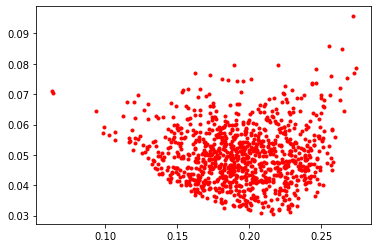

In [4]:

frontierData.sort(key=lambda row: (row[0]))
x=[]
y=[]
for each in frontierData:
    x.append(each[0])
    y.append(each[1])

plt.plot(x, y, 'r.')
plt.show()


Ticker aktíva | Pôvodné váhy v portfóliu | Očakávaný ročný výnos |
| :- | :- | :-: |
| Stretched | Gaussian | .843